In [16]:
import pandas as pd
from preprocessing import pregame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Let's download the CSV file from the provided URL using Python's requests library.
import requests

# URL of the CSV file to be downloaded
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"

# Use requests to download the file
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the request to a file
    with open("./penguins.csv", "wb") as file:
        file.write(response.content)
    result = "File successfully downloaded: /mnt/data/penguins.csv"
else:
    result = "Failed to download the file."

result


'File successfully downloaded: /mnt/data/penguins.csv'

In [29]:
df = pd.read_csv("penguins.csv")

In [30]:
pre = pregame(df)

In [20]:
pre.checks()

INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None
DESCRIPTION: 
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000   

In [6]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


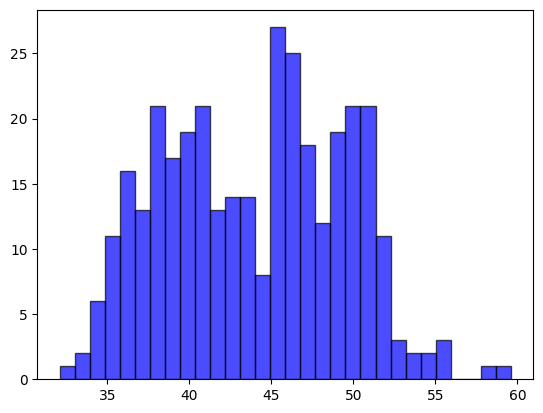

In [8]:
plt.hist(df["bill_length_mm"],bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.show()

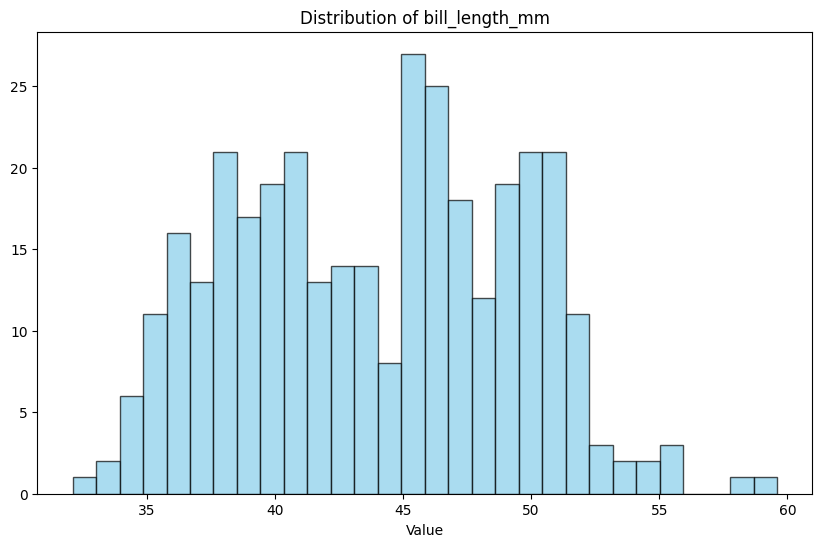

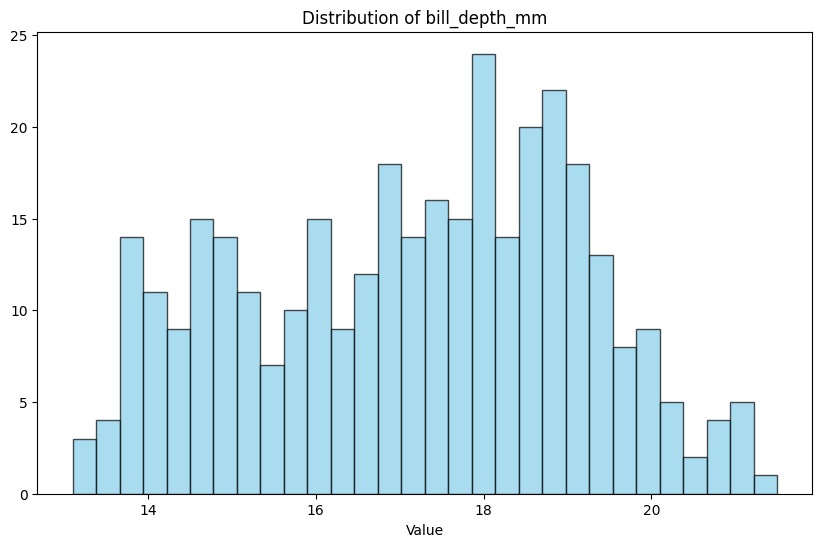

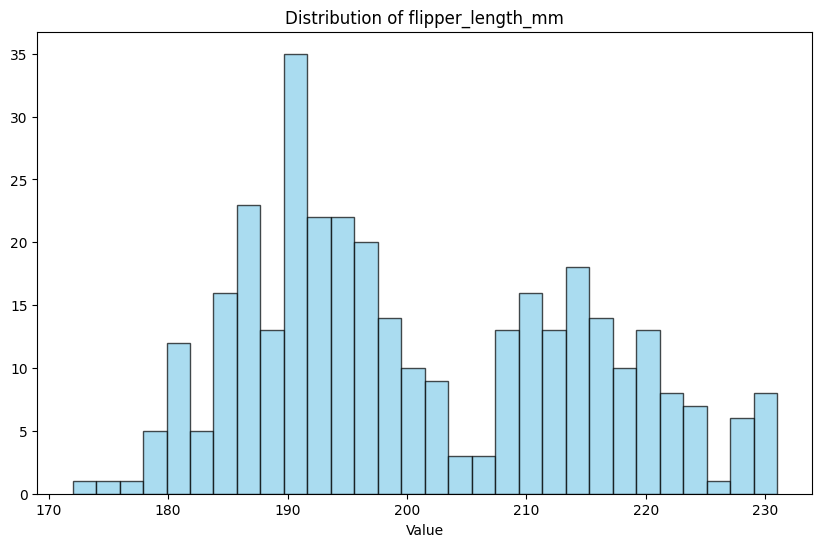

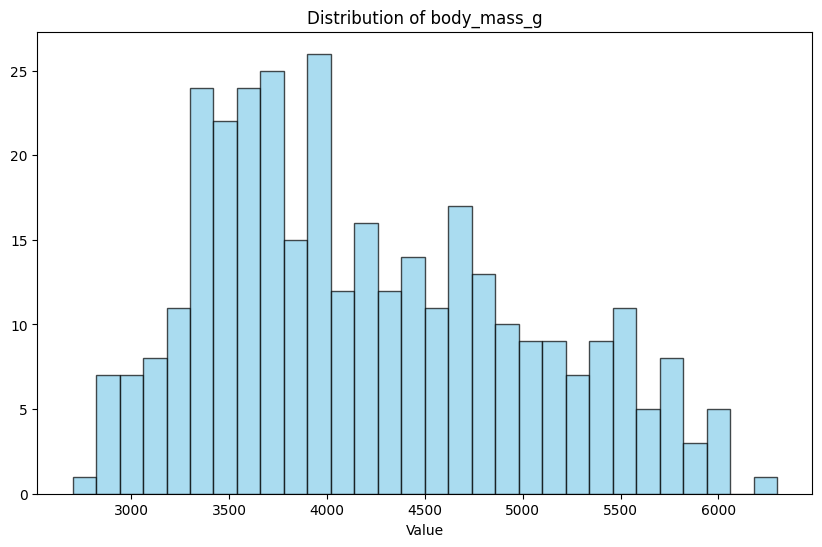

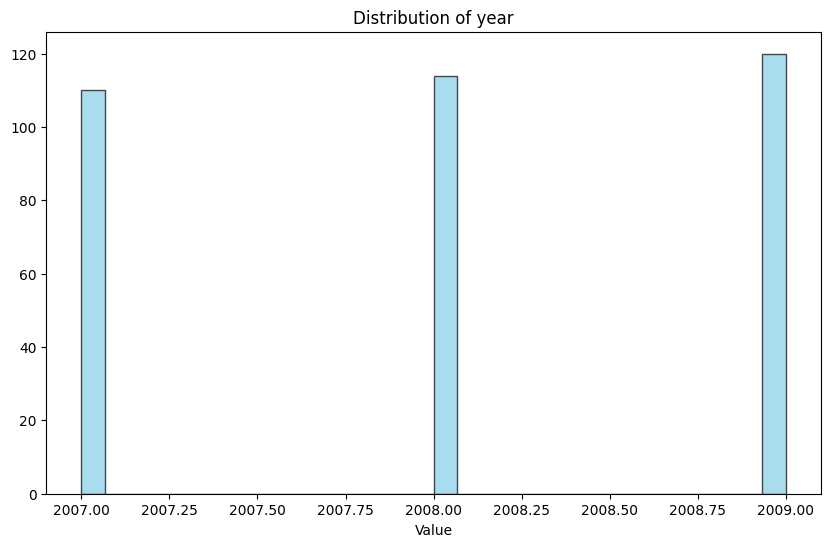

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Plotting histograms for all numeric variables
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')

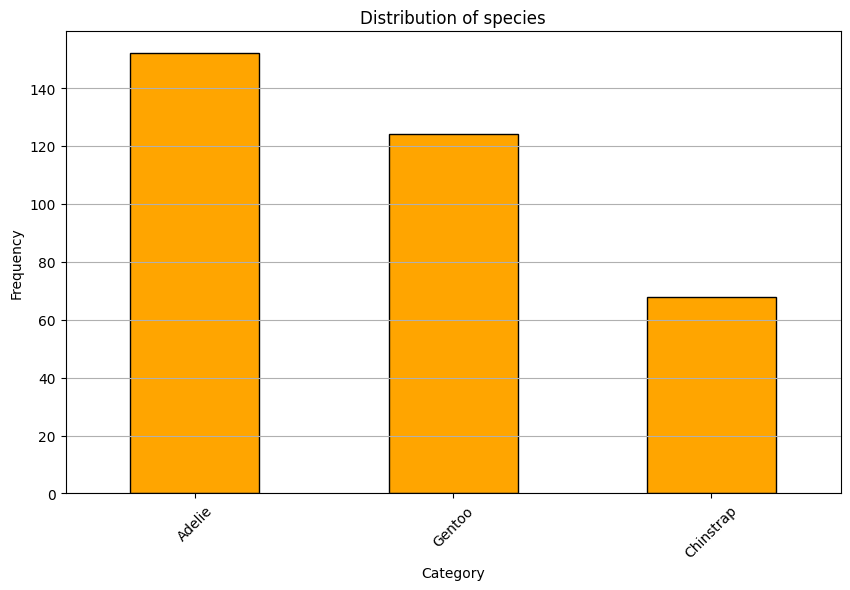

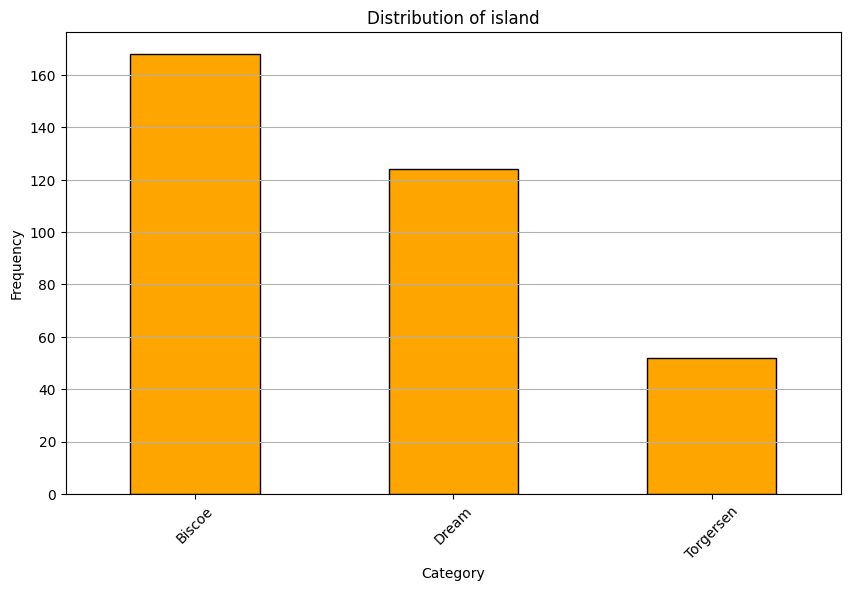

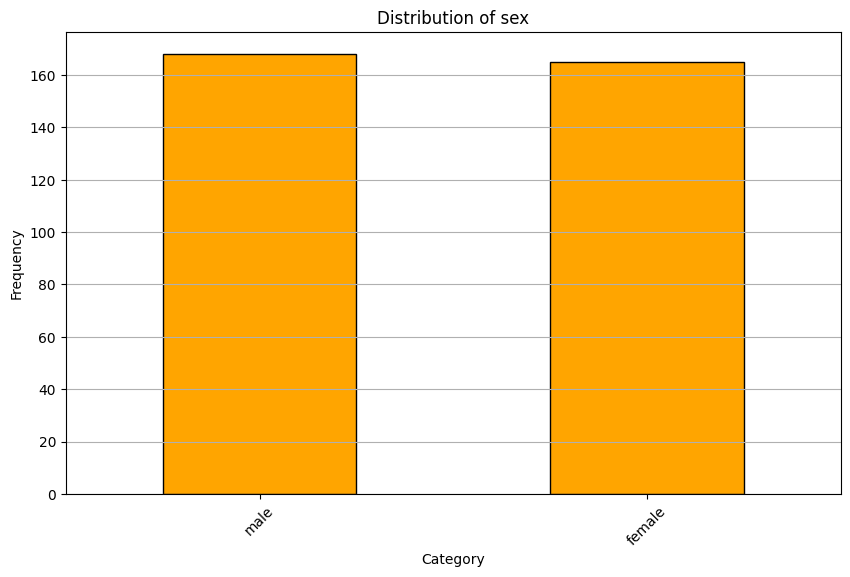

In [10]:
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Plotting bar charts for all categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

In [11]:
df[df['bill_depth_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [51]:
cols_to_drop = ["bill_length_mm","bill_depth_mm"]

In [34]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [28]:
df["year"].value_counts()

2009    117
2008    113
2007    103
Name: year, dtype: int64

In [27]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [38]:
df[df["sex"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [42]:
df = pre.foreplay("sex", "unknown")

In [44]:
df.isnull().sum()


species              0
island               0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  0
year                 0
dtype: int64

In [52]:
pre.micdrop("na", cols_to_drop)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [54]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [57]:
df = pre.check_outliers() #NOT SURE THAT OUTLIERS WERE REALLY REMOVED

numeric columns:       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0              39.1           18.7              181.0       3750.0  2007
1              39.5           17.4              186.0       3800.0  2007
2              40.3           18.0              195.0       3250.0  2007
4              36.7           19.3              193.0       3450.0  2007
5              39.3           20.6              190.0       3650.0  2007
..              ...            ...                ...          ...   ...
339            55.8           19.8              207.0       4000.0  2009
340            43.5           18.1              202.0       3400.0  2009
341            49.6           18.2              193.0       3775.0  2009
342            50.8           19.0              210.0       4100.0  2009
343            50.2           18.7              198.0       3775.0  2009

[342 rows x 5 columns]


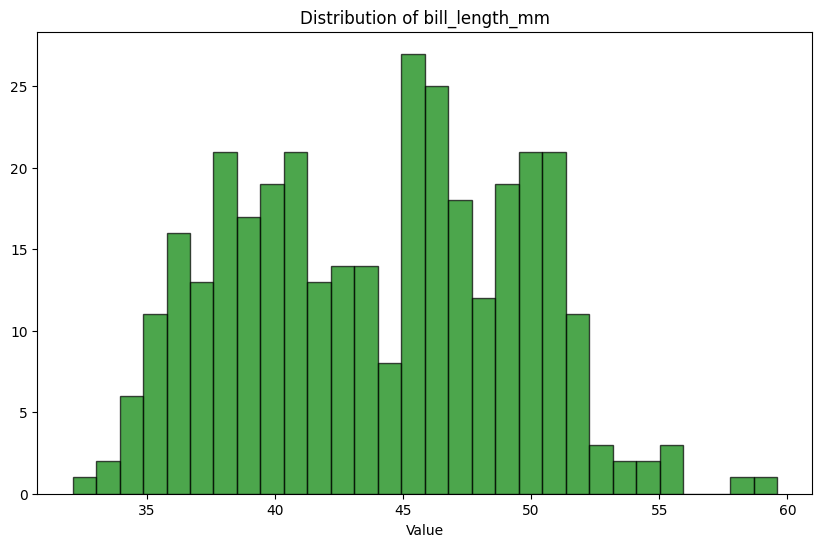

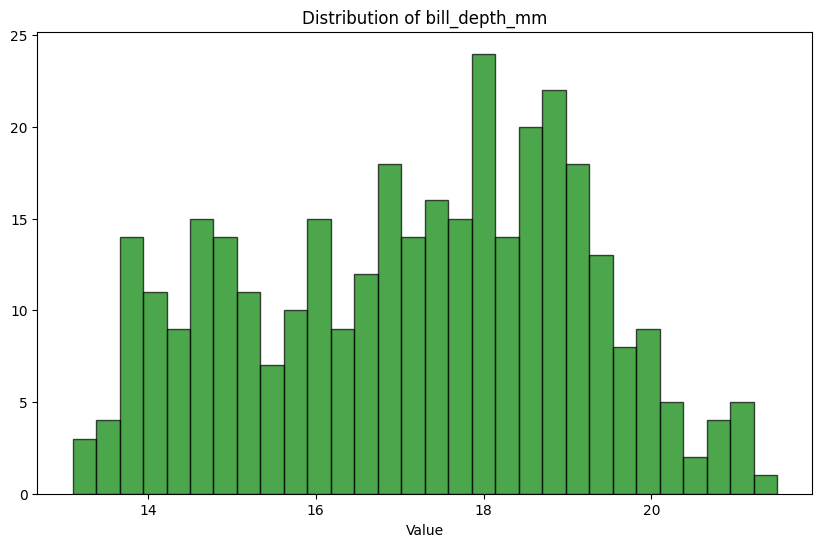

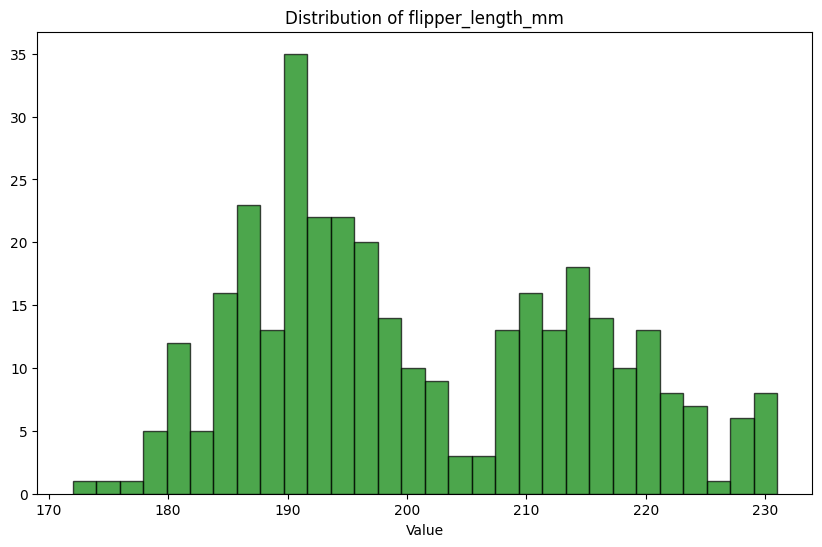

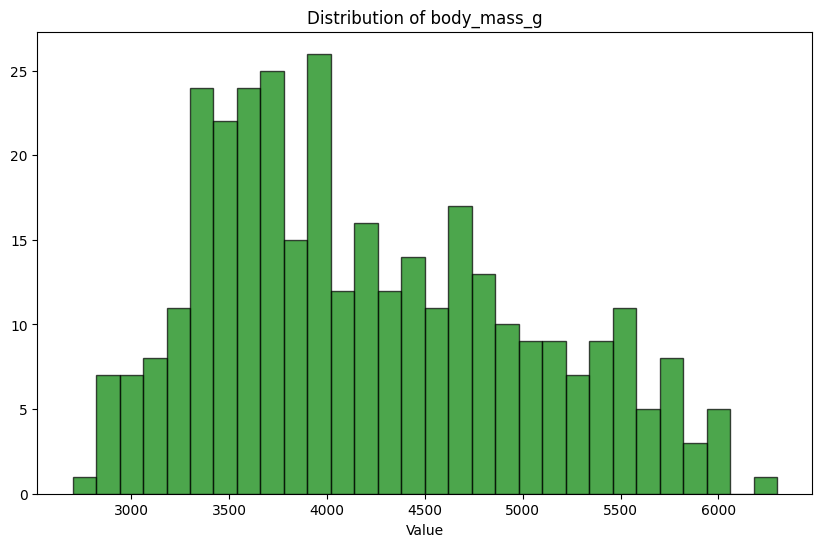

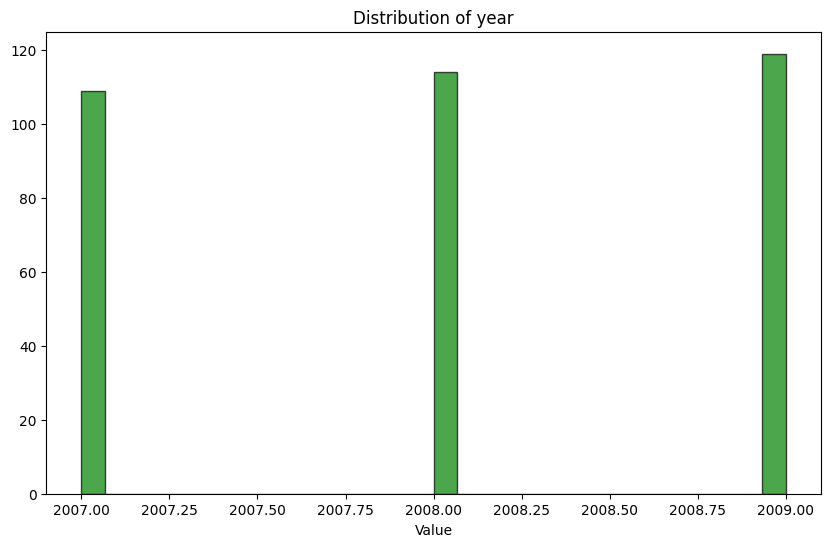

In [58]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Plotting histograms for all numeric variables
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col].dropna(), bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')

In [60]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

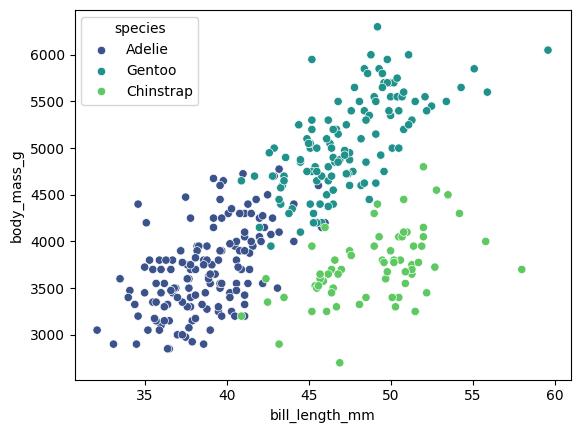

In [64]:
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species', palette='viridis')
plt.show()

In [76]:
peng_per_island = df.groupby("island")["species"].count().reset_index(name = "count")
print(peng_per_island)
island = peng_per_island.island.tolist()
print(island)

      island  count
0     Biscoe    167
1      Dream    124
2  Torgersen     51
['Biscoe', 'Dream', 'Torgersen']


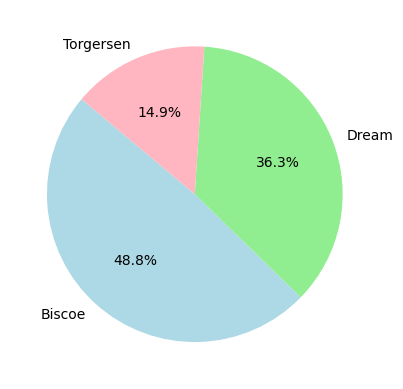

In [79]:
plt.pie(peng_per_island["count"], labels=island, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightpink'])
plt.title("Count of penguins on each island")
plt.show()

In [80]:
sex_per_species = df.groupby("species")["sex"].count().reset_index(name = "count")
sex_per_species

,species,count
0,Adelie,151
1,Chinstrap,68
2,Gentoo,123


<BarContainer object of 3 artists>

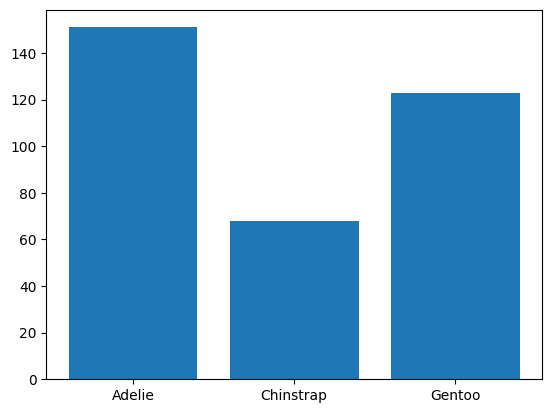

In [82]:
plt.bar(sex_per_species["species"], sex_per_species["count"])
plt.show()

In [87]:
column_numeric = df.select_dtypes(include =['number', 'float', 'integer'])
print(column_numeric)
correlation_matrix = column_numeric.corr()

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year
0              39.1           18.7              181.0       3750.0  2007
1              39.5           17.4              186.0       3800.0  2007
2              40.3           18.0              195.0       3250.0  2007
4              36.7           19.3              193.0       3450.0  2007
5              39.3           20.6              190.0       3650.0  2007
..              ...            ...                ...          ...   ...
339            55.8           19.8              207.0       4000.0  2009
340            43.5           18.1              202.0       3400.0  2009
341            49.6           18.2              193.0       3775.0  2009
342            50.8           19.0              210.0       4100.0  2009
343            50.2           18.7              198.0       3775.0  2009

[342 rows x 5 columns]


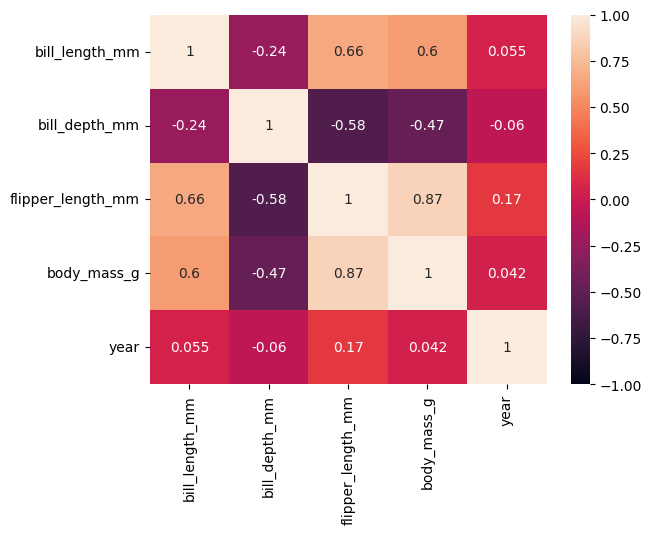

In [88]:
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1)
plt.show()

In [89]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(18,6))
for ax, col in

<ipython-input-96-235f8aa6dc6d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=df_for_box, x='species', y='flipper_length_mm', palette=species_palette)
<ipython-input-96-235f8aa6dc6d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=df_for_box, x='species', y='body_mass_g', palette=species_palette)
<ipython-input-96-235f8aa6dc6d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=df_for_box, x='species', y='bill_length_mm', palette=species_palette)
<ipython-input-96-235f8aa6dc6d>

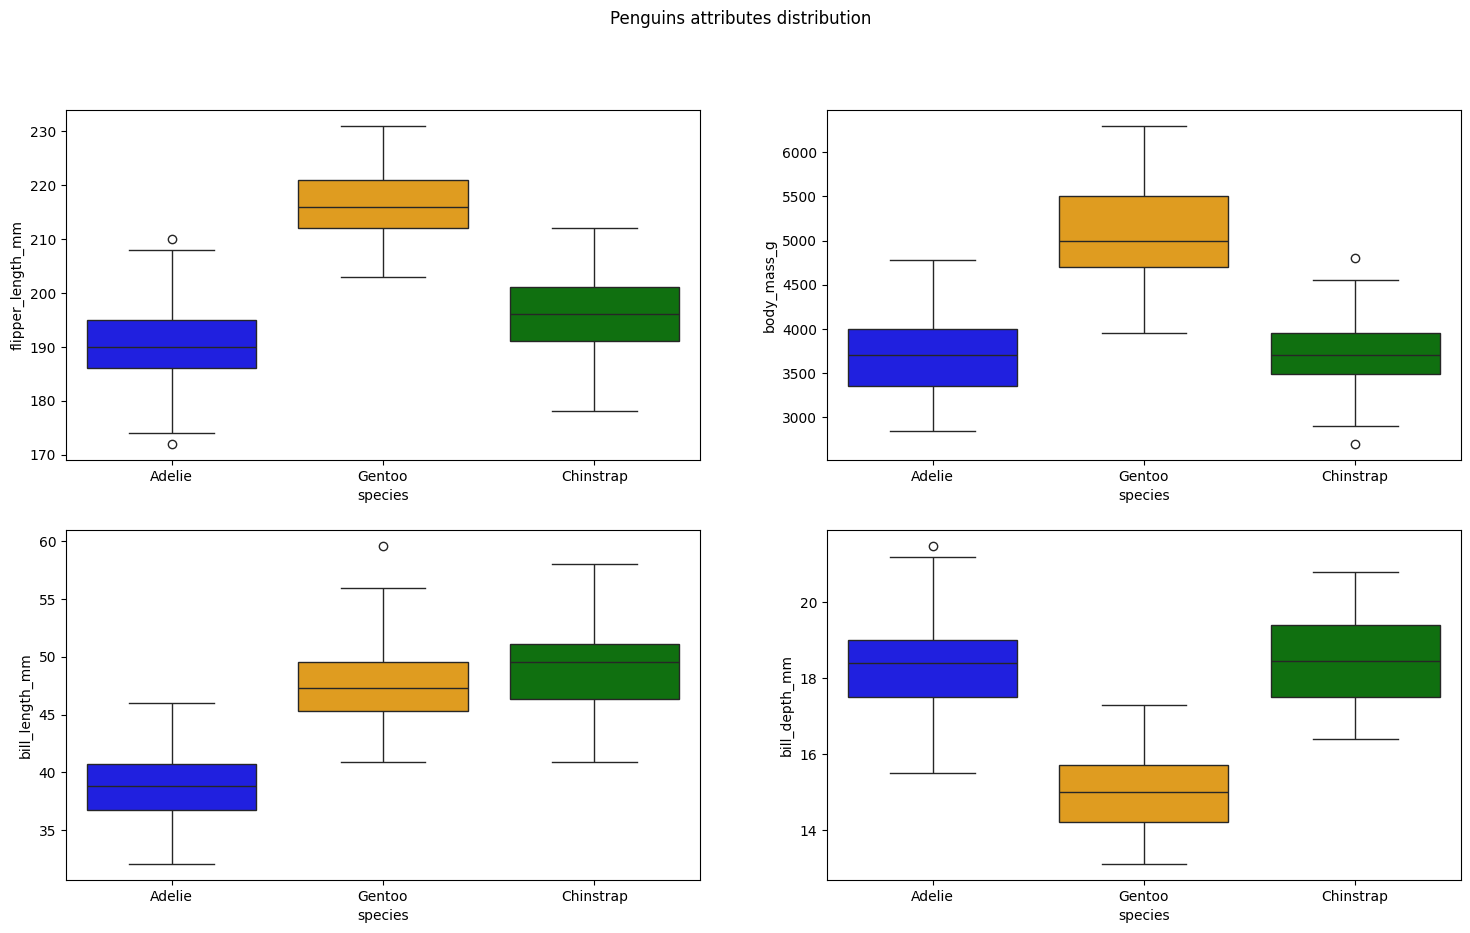

In [96]:
relevant_cols = ["bill_length_mm", "bill_depth_mm","body_mass_g", "species", "flipper_length_mm"]
df_for_box = df[relevant_cols]

species_palette = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'orange'}

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Penguins attributes distribution')

# Plot boxplots for each attribute with species-specific colors

sns.boxplot(ax=axes[0, 0], data=df_for_box, x='species', y='flipper_length_mm', palette=species_palette)
sns.boxplot(ax=axes[0, 1], data=df_for_box, x='species', y='body_mass_g', palette=species_palette)
sns.boxplot(ax=axes[1, 0], data=df_for_box, x='species', y='bill_length_mm', palette=species_palette)
sns.boxplot(ax=axes[1, 1], data=df_for_box, x='species', y='bill_depth_mm', palette=species_palette)

plt.show()

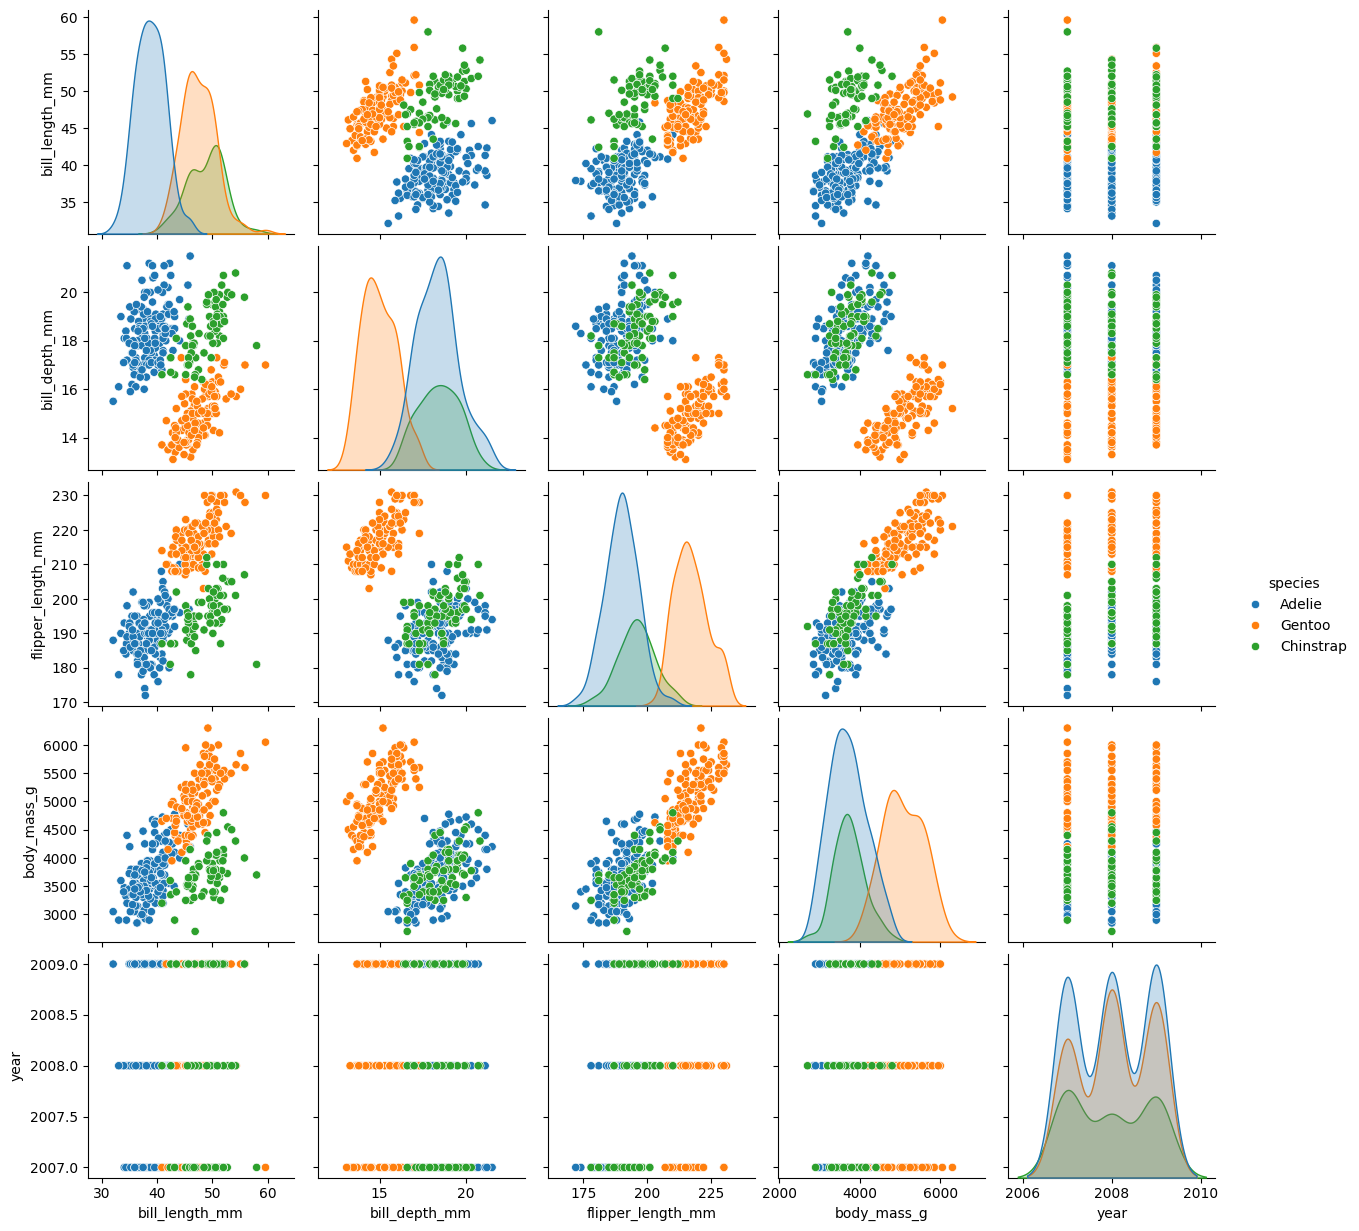

In [94]:
sns.pairplot(df, hue="species", markers ="o")